In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [88]:
data = pd.read_csv('customer_churn_data.csv')

In [89]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [90]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [91]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5880,5880,5880.000000,5880,5880,5880.000000,5880,5880,5880,5880,...,5880,5880,5880,5880,5880,5880,5880,5880.000000,5880.000000,5880
unique,5880,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,CUST5879,Male,NaN,Yes,No,NaN,Yes,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card,NaN,NaN,No
freq,1,2950,NaN,2995,3004,NaN,2941,2939,2029,2029,...,2029,2029,2029,2029,2020,2990,1503,NaN,NaN,2982
mean,NaN,NaN,0.500680,NaN,NaN,36.549150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.157779,2566.813165,NaN
std,NaN,NaN,0.500042,NaN,NaN,20.909674,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.804615,1910.017743,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.030000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.717500,1020.217500,NaN
50%,NaN,NaN,1.000000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.155000,2136.445000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.457500,3767.665000,NaN


In [92]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [94]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

In [95]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,0
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,1
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,1
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,0
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,0
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,1
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,0
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,0


In [96]:
data = data.drop(['Partner', 'Dependents'], axis = 1)

In [97]:
data

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,0
1,CUST0001,Female,0,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,1
2,CUST0002,Male,1,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,1
3,CUST0003,Male,1,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,0
4,CUST0004,Male,1,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,0
5876,CUST5876,Male,0,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,1
5877,CUST5877,Female,0,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,0
5878,CUST5878,Female,0,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,0


In [98]:
data.rename(columns={"SeniorCitizen": "Age>60"}, inplace=True)

In [99]:
data

,customerID,gender,Age>60,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,0
1,CUST0001,Female,0,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,1
2,CUST0002,Male,1,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,1
3,CUST0003,Male,1,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,0
4,CUST0004,Male,1,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,0
5876,CUST5876,Male,0,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,1
5877,CUST5877,Female,0,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,0
5878,CUST5878,Female,0,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,0


In [100]:
cols = [
    "PhoneService","MultipleLines","InternetService","OnlineSecurity",
    "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"
]

data["serviceUsageStats"] = (data[cols] == "Yes").sum(axis=1)

data.drop(columns=cols, inplace=True)


In [101]:
data

,customerID,gender,Age>60,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,serviceUsageStats
0,CUST0000,Male,0,23,Month-to-month,Yes,Bank transfer,49.85,1146.55,0,0
1,CUST0001,Female,0,43,Month-to-month,No,Mailed check,100.70,4330.10,1,3
2,CUST0002,Male,1,51,One year,No,Electronic check,97.33,4963.83,1,4
3,CUST0003,Male,1,72,Month-to-month,No,Credit card,101.38,7299.36,0,4
4,CUST0004,Male,1,25,Month-to-month,No,Electronic check,52.22,1305.50,1,4
...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,71,Month-to-month,Yes,Mailed check,74.21,5268.91,0,3
5876,CUST5876,Male,0,22,One year,No,Mailed check,65.43,1439.46,1,5
5877,CUST5877,Female,0,68,One year,Yes,Bank transfer,59.78,4065.04,0,4
5878,CUST5878,Female,0,14,Month-to-month,Yes,Mailed check,91.88,1286.32,0,6


In [102]:
data.to_csv("project1.csv", index=False)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         5880 non-null   object 
 1   gender             5880 non-null   object 
 2   Age>60             5880 non-null   int64  
 3   tenure             5880 non-null   int64  
 4   Contract           5880 non-null   object 
 5   PaperlessBilling   5880 non-null   object 
 6   PaymentMethod      5880 non-null   object 
 7   MonthlyCharges     5880 non-null   float64
 8   TotalCharges       5880 non-null   float64
 9   Churn              5880 non-null   int64  
 10  serviceUsageStats  5880 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 505.4+ KB


### Churn Distribution

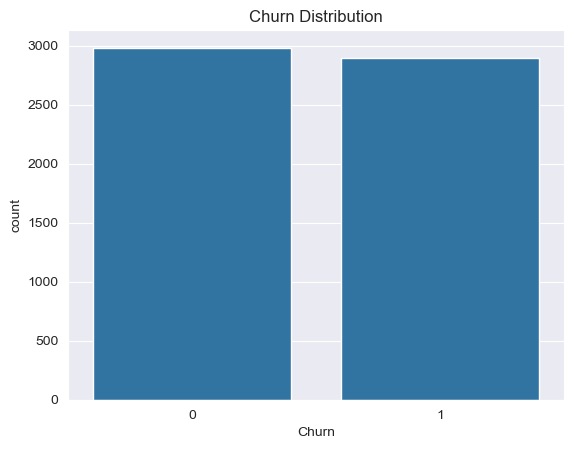

In [104]:
sns.countplot(x="Churn", data=data)
plt.title("Churn Distribution")
plt.show()

### Contract vs churn

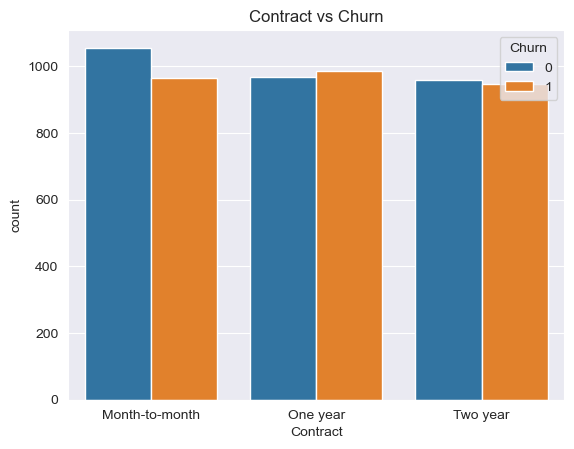

In [105]:
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Contract vs Churn")
plt.show()

### Payment vs Churn

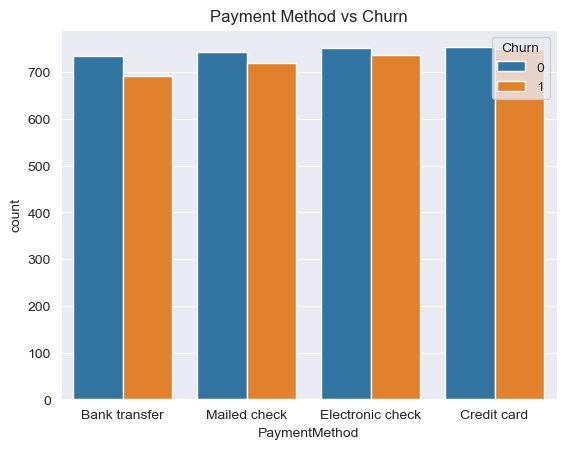

In [106]:
sns.countplot(x="PaymentMethod", hue="Churn", data=data)
plt.title("Payment Method vs Churn")
plt.show()

### Monthly Charges vs Churn

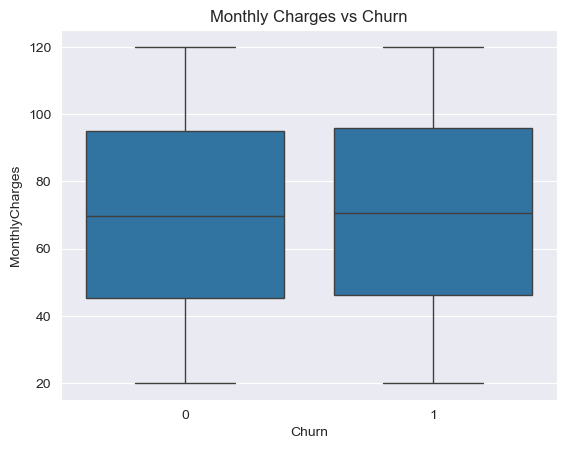

In [107]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

In [108]:
data = data.drop("customerID", axis=1)

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
cat_cols = ["gender", "Contract", "PaperlessBilling", "PaymentMethod"]
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [111]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

In [112]:
X

,gender,Age>60,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,serviceUsageStats
0,1,0,23,0,1,0,49.85,1146.55,0
1,0,0,43,0,0,3,100.70,4330.10,3
2,1,1,51,1,0,2,97.33,4963.83,4
3,1,1,72,0,0,1,101.38,7299.36,4
4,1,1,25,0,0,2,52.22,1305.50,4
...,...,...,...,...,...,...,...,...,...
5875,1,0,71,0,1,3,74.21,5268.91,3
5876,1,0,22,1,0,3,65.43,1439.46,5
5877,0,0,68,1,1,0,59.78,4065.04,4
5878,0,0,14,0,1,3,91.88,1286.32,6


In [113]:
y

0       0
1       1
2       1
3       0
4       1
       ..
5875    0
5876    1
5877    0
5878    0
5879    1
Name: Churn, Length: 5880, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression

In [121]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.4710884353741497
              precision    recall  f1-score   support

           0       0.48      0.66      0.55       584
           1       0.46      0.29      0.35       592

    accuracy                           0.47      1176
   macro avg       0.47      0.47      0.45      1176
weighted avg       0.47      0.47      0.45      1176



### confusion matrix

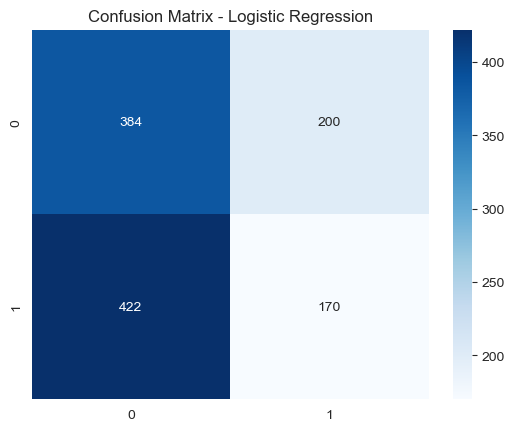

In [123]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### random forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.4812925170068027
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       584
           1       0.48      0.46      0.47       592

    accuracy                           0.48      1176
   macro avg       0.48      0.48      0.48      1176
weighted avg       0.48      0.48      0.48      1176



In [128]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

importance_df.index = importance_df.index + 1   
importance_df.head(10)

,Feature,Importance
1,MonthlyCharges,0.254294
2,TotalCharges,0.253596
3,tenure,0.188539
4,serviceUsageStats,0.100171
5,PaymentMethod,0.065568
6,Contract,0.045050
7,PaperlessBilling,0.031866
8,Age>60,0.030865
9,gender,0.030050


## The most important factors affecting customer churn are:

### MonthlyCharges – higher monthly cost increases churn risk.
### tenure – customers with low tenure churn more
### TotalCharges – lower total spending customers tend to leave early
### Contract – month-to-month contracts show higher churn compared to long-term plans
### PaymentMethod – some payment methods are linked with more churn
### PaperlessBilling – customers using paperless billing may show higher churn patterns
### serviceUsageStats – usage behavior impacts churn probability
### Age>60 – senior customers can have different churn behavior
### gender – has minor influence compared to other features

## Recommendations to Reduce Churn
### 1) Reduce churn in month-to-month customers : Offer discounts or benefits to move them to 1-year or 2-year contracts.
### 2) Provide personalized offers for high MonthlyCharges users : Give loyalty discounts, bundle plans, or cheaper alternatives for customers paying more.
### 3) Focus on early tenure customers (0–6 months) : Create onboarding support, welcome offers, and regular follow-ups to keep new customers engaged.
### 4) Improve payment experience : Encourage customers to switch to smoother payment methods (auto-pay, online payments) with incentives.
### 5) Target high-risk customers using usage stats : Monitor customers with unusual/low service usage and provide proactive support or engagement offers.